In [468]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### The code loads  datasets into Pandas DataFrames

In [472]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
stores_data = pd.read_csv("stores.csv")
oil_data = pd.read_csv("oil.csv")
holidays_data = pd.read_csv("holidays_events.csv")
sample_submission_data = pd.read_csv("sample_submission.csv")

###  Display the first few rows of each dataset

In [475]:
print("Train Data:")
display(train_data.head())

Train Data:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


**The train dataset contains historical sales data for various products across different stores, which is used to train a sales forecasting model.**

**id** – **A unique identifier for each record.**

**date** – **The date on which sales data was recorded.**

**store_nbr** – **The store number where the sales happened.**

**family** – **The category of the product (e.g., AUTOMOTIVE, BABY CARE, etc.).**

**sales** – **The total sales (in units) for that product family on that date.**

**onpromotion** – **The number of items in that product family that were on promotion that day.**

In [478]:
print("Test Data:")
display(test_data.head())

Test Data:


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


**The test dataset is used for making predictions. It has future dates where sales need to be predicted but does not include actual sales values (unlike the train dataset)**

In [481]:
print("Stores Data:")
display(stores_data.head())

Stores Data:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


**The stores dataset provides details about each store, such as its location and type. This information helps in understanding store-specific factors that might influence sales**.

**store_nbr – A unique number assigned to each store.**

**city – The city where the store is located.**

**state – The state or region of the store.**

**type – The type of store (e.g., A, B, C, D), which may indicate size, format, or target customers.**

**cluster – The cluster groups stores with similar sales patterns and customer behavior..**

In [484]:
print("Oil Prices Data:")
display(oil_data.head())

Oil Prices Data:


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


**This dataset contains daily oil prices, which can impact the economy and influence sales.**

**date – The date of the recorded oil price.**

**dcoilwtico – The price of oil (West Texas Intermediate - WTI).**

**Since oil prices affect transportation costs and product prices, they might indirectly influence sales trends. Some dates may have missing values (NaN), which need to be handled during analysis**

In [487]:
print("Holidays and Events Data:")
display(holidays_data.head())

Holidays and Events Data:


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


**This dataset lists holidays and special events that might impact store sales.**

**date – The date of the holiday or event.**

**type – The type of event.**

**locale – The level at which the holiday applies (National, Regional, or Local).**

**locale_name – The specific region or city where the holiday is observed.**

**description – The name or details of the holiday/event.**

**transferred – True/False indicating if the holiday was moved to another date.**

In [490]:
print("Sample Submission Data:")
display(sample_submission_data.head())

Sample Submission Data:


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


### To check the structure, missing values, and column types

In [493]:
# To Check dataset information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


**Total Rows: 3,000,888 (indicating a large dataset).**

In [496]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [498]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [500]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [502]:
holidays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [503]:
# Check dataset information
train_data.info()
test_data.info()
stores_data.info()
oil_data.info()
holidays_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------

### Checking for missing values

In [505]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [507]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [509]:
stores_data.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [511]:
holidays_data.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [513]:
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

**Missing values present only in oil data**

### Handling Missing values in oil data by using interpolation

**Interpolation works well for time-series data like oil prices because:**

**Oil prices change gradually –** They don’t jump suddenly, so estimating missing values using nearby prices makes sense.

**Smooth data flow –** Some prices are missing due to weekends or holidays, but we can still estimate them based on previous and next values.

**More accurate than average –** Using the mean or median would ignore the natural trend of oil prices over time.

In [519]:
oil_data["dcoilwtico"] = oil_data["dcoilwtico"].interpolate()

In [520]:
oil_data.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

**Still having one missing value**

### Checking the Position of the Missing Value

**If the missing value is at the start or end , linear interpolation might not work,we have to try forward fill or backward fill,lets check**

In [526]:
print(oil_data[oil_data["dcoilwtico"].isnull()])

         date  dcoilwtico
0  2013-01-01         NaN


##### Yeah the missing value at the starting position

In [528]:
oil_data["dcoilwtico"] = oil_data["dcoilwtico"].fillna(method='bfill')

In [529]:
oil_data.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

### Convert date columns to datetime format

In [532]:
train_data["date"] = pd.to_datetime(train_data["date"])
test_data["date"] = pd.to_datetime(test_data["date"])
oil_data["date"] = pd.to_datetime(oil_data["date"])
holidays_data["date"] = pd.to_datetime(holidays_data["date"])

In [548]:
print(train_data.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object


#### Now date column is stored as a datetime object instead of a string.

### Merging datasets

In [557]:
train_data = train_data.merge(stores_data, on="store_nbr", how="left")
train_data = train_data.merge(oil_data, on="date", how="left")
train_data = train_data.merge(holidays_data, on="date", how="left")

In [559]:
test_data = test_data.merge(stores_data, on="store_nbr", how="left")
test_data = test_data.merge(oil_data, on="date", how="left")
test_data = test_data.merge(holidays_data, on="date", how="left")

**This code merges additional information into both train and test datasets to improve sales forecasting.**

**Merging store data (store_nbr) → Adds details about each store, like location and type.**

**Merging oil price data (date) → Includes daily oil prices, which can impact the economy and sales.**

**Merging holiday data (date) → Adds holiday and event details, as special occasions can affect sales.**

**We do this for both train and test data to ensure the model learns patterns from past sales (train) and applies the same logic to predict future sales (test). It helps the model make better predictions by considering real-world factors that influence sales**

In [562]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  type_y       object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 372.8+ MB


In [564]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type_x       28512 non-null  object        
 8   cluster      28512 non-null  int64         
 9   dcoilwtico   21384 non-null  float64       
 10  type_y       1782 non-null   object        
 11  locale       1782 non-null   object        
 12  locale_name  1782 non-null   object        
 13  description  1782 non-null   object        
 14  transferred  1782 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(9)

### Extracting year, month, day, day of the week, and whether it's a weekend or weekday.

In [567]:
train_data["year"] = train_data["date"].dt.year
train_data["month"] = train_data["date"].dt.month
train_data["day"] = train_data["date"].dt.day
train_data["day_of_week"] = train_data["date"].dt.weekday  # Monday = 0, Sunday = 6
train_data["is_weekend"] = train_data["day_of_week"].isin([5, 6]).astype(int)  # 1 if weekend, else 0

In [568]:
print(train_data.head())

   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type_x  cluster  ...   type_y    locale locale_name         description  \
0      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
1      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
2      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
3      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
4      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   

  transferred  year  month  day  day_of_week  is_w

**This code helps the model understand time-based patterns in sales. By breaking down the date into year, month, day, and day of the week, we give the model a way to recognize trends like seasonality and weekly sales fluctuations. For example, sales might be higher in December due to holiday shopping, or lower on Mondays when fewer people shop.**

**The is_weekend feature is important because weekends (Saturday and Sunday) often have different sales patterns compared to weekdays. Some products may sell more on weekends (like beverages or snacks), while others may see more demand on weekdays (like office supplies). By adding this feature, the model can better predict sales based on the day of the week.**

**Without these time-based features, the model might struggle to capture these natural patterns, making the predictions less accurate.**

## Lag Features

In [572]:
train_data["sales_ma_7"] = train_data.groupby(["store_nbr", "family"])["sales"].transform(lambda x: x.rolling(window=7).mean())
train_data["sales_ma_30"] = train_data.groupby(["store_nbr", "family"])["sales"].transform(lambda x: x.rolling(window=30).mean())

In [573]:
train_data.describe

<bound method NDFrame.describe of               id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3054343  3000883 2017-08-15          9                     POULTRY   438.133   
3054344  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3054345  3000885 2017-08-15          9                     PRODUCE  2419.729   
3054346  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3054347  3000887 2017-08-15          9                     SEAFOOD    16.000   

     

**This code helps the model remember what sales were like exactly a week ago (sales_lag_7) and a month ago (sales_lag_30). Why? Because shopping habits tend to follow patterns—like more grocery shopping on weekends or increased spending at the end of the month when people get paid.**

**By adding these lagged sales as features, the model isn’t just making random guesses—it’s learning from past trends to make smarter predictions. It’s just like checking your previous month’s electricity bill to estimate this month’s cost—it makes forecasting much more accurate**

## Rolling Statistics

In [578]:
train_data["sales_ma_7"] = train_data.groupby(["store_nbr", "family"])["sales"].transform(lambda x: x.rolling(window=7).mean())
train_data["sales_ma_30"] = train_data.groupby(["store_nbr", "family"])["sales"].transform(lambda x: x.rolling(window=30).mean())

**This code takes sales data for each store and product category and smooths it out. It looks at the average sales over the past 7 days and 30 days, making it easier to see patterns. The 7-day average helps with weekly trends (like weekend spikes), while the 30-day average captures bigger seasonal changes. This way, the model gets a clearer picture of sales behavior instead of getting distracted by random daily ups and downs.**

### Creating binary features indicating if a day is a holiday or near a holiday.

In [588]:
train_data["is_holiday"] = train_data["description"].notnull().astype(int)
train_data["is_near_holiday"] = train_data["is_holiday"].shift(1, fill_value=0) | train_data["is_holiday"].shift(-1, fill_value=0)

In [589]:
print(train_data[["date", "description", "is_holiday"]].head(10))

        date         description  is_holiday
0 2013-01-01  Primer dia del ano           1
1 2013-01-01  Primer dia del ano           1
2 2013-01-01  Primer dia del ano           1
3 2013-01-01  Primer dia del ano           1
4 2013-01-01  Primer dia del ano           1
5 2013-01-01  Primer dia del ano           1
6 2013-01-01  Primer dia del ano           1
7 2013-01-01  Primer dia del ano           1
8 2013-01-01  Primer dia del ano           1
9 2013-01-01  Primer dia del ano           1


In [591]:
print(train_data["is_holiday"].value_counts())

is_holiday
0    2551824
1     502524
Name: count, dtype: int64


In [593]:
print(train_data[train_data["is_holiday"] == 1].head(10))

   id       date  store_nbr        family  sales  onpromotion   city  \
0   0 2013-01-01          1    AUTOMOTIVE    0.0            0  Quito   
1   1 2013-01-01          1     BABY CARE    0.0            0  Quito   
2   2 2013-01-01          1        BEAUTY    0.0            0  Quito   
3   3 2013-01-01          1     BEVERAGES    0.0            0  Quito   
4   4 2013-01-01          1         BOOKS    0.0            0  Quito   
5   5 2013-01-01          1  BREAD/BAKERY    0.0            0  Quito   
6   6 2013-01-01          1   CELEBRATION    0.0            0  Quito   
7   7 2013-01-01          1      CLEANING    0.0            0  Quito   
8   8 2013-01-01          1         DAIRY    0.0            0  Quito   
9   9 2013-01-01          1          DELI    0.0            0  Quito   

       state type_x  cluster  ...  transferred  year month day day_of_week  \
0  Pichincha      D       13  ...        False  2013     1   1           1   
1  Pichincha      D       13  ...        False  201

**This code helps the model understand the impact of holidays on sales. The first part creates a new column, "is_holiday", which marks whether a particular day is a holiday (1) or not (0). It does this by checking if there is a holiday description in the dataset. The second part, "is_near_holiday", checks if a holiday is just before or after the current day. It shifts the "is_holiday" column up and down by one row to see if the previous or next day is a holiday. If either is true, it marks that day as near a holiday (1). This is useful because sales often change not just on holidays but also around them—for example, people might shop more the day before a big holiday like Christmas or New Year’s.**

### Smoothing Oil Price Trends with Moving Averages

In [597]:
print(train_data.shape[0])  # Total rows

3054348


### Grouping Data by Date and Calculating the Average Oil Price

In [599]:
train_df = train_data.groupby("date", as_index=False).agg({"dcoilwtico": "mean"})

**This code is used to group the dataset by date and calculate the average oil price for each date. Sometimes, the dataset might have multiple entries for the same date, so we need to combine them into a single value. Taking the average ensures that we get a clean and representative value for each day. It helps in removing duplicate entries for the same date, ensures that the dataset is properly structured for analysis and visualization, and makes it easier to calculate trends and moving averages without duplicate values affecting the results. In simple terms, we are cleaning and organizing the data so we can work with it more efficiently.**

### Calculating 7-Day and 30-Day Moving Averages for Oil Prices

In [603]:
train_df["oil_price_ma_7"] = train_df["dcoilwtico"].rolling(window=7, min_periods=1).mean()
train_df["oil_price_ma_30"] = train_df["dcoilwtico"].rolling(window=30, min_periods=1).mean()

**This code is used to smooth out short-term fluctuations in oil prices by calculating the 7-day and 30-day moving averages. The moving average helps to identify trends in the data by averaging the oil prices over a specific period. The 7-day moving average captures short-term trends, while the 30-day moving average gives a broader and more stable trend over a longer period.**

**We use .rolling(window=7, min_periods=1).mean() to take the average of the last 7 days, and similarly, .rolling(window=30, min_periods=1).mean() for 30 days. The parameter min_periods=1 ensures that even for the first few days (when there aren’t enough past values), the calculation still works by taking the available values.**

**This technique is useful for forecasting, trend analysis, and reducing noise in the data. Instead of looking at raw, fluctuating prices, moving averages give a clearer picture of price trends over time.**

**This code prints the first 10 rows of the dataset, specifically showing the date, original oil price (dcoilwtico), and the 7-day moving average (oil_price_ma_7). We use this to quickly check if the moving average has been calculated correctly and to ensure that the data looks as expected.**

**By running .head(10), we can verify the first few values and see how the 7-day moving average smooths the oil price fluctuations. This helps in debugging and validating our calculations before moving forward with further analysis.**

In [607]:
print(train_df[["date", "dcoilwtico", "oil_price_ma_7"]].head(10))

        date  dcoilwtico  oil_price_ma_7
0 2013-01-01       93.14       93.140000
1 2013-01-02       93.14       93.140000
2 2013-01-03       92.97       93.083333
3 2013-01-04       93.12       93.092500
4 2013-01-05         NaN       93.092500
5 2013-01-06         NaN       93.092500
6 2013-01-07       93.20       93.114000
7 2013-01-08       93.21       93.128000
8 2013-01-09       93.08       93.116000
9 2013-01-10       93.81       93.284000


In [608]:
train_df["dcoilwtico"].fillna(method="ffill", inplace=True)

**This code fills any missing values in the dcoilwtico (oil price) column using the forward fill (ffill) method. This means that if a particular day's oil price is missing, it will be replaced with the last available price from a previous day.**

**We use this because in time series data, missing values can cause issues in analysis and modeling. Since oil prices don’t change drastically within short periods, using the last known value is a reasonable way to handle gaps. This ensures that our data remains complete and consistent for further processing and predictions.**

In [611]:
train_df["oil_price_ma_7"] = train_df["dcoilwtico"].rolling(window=7, min_periods=1).mean()
train_df["oil_price_ma_30"] = train_df["dcoilwtico"].rolling(window=30, min_periods=1).mean()

In [612]:
print(train_df.head(10))

        date  dcoilwtico  oil_price_ma_7  oil_price_ma_30
0 2013-01-01       93.14       93.140000        93.140000
1 2013-01-02       93.14       93.140000        93.140000
2 2013-01-03       92.97       93.083333        93.083333
3 2013-01-04       93.12       93.092500        93.092500
4 2013-01-05       93.12       93.098000        93.098000
5 2013-01-06       93.12       93.101667        93.101667
6 2013-01-07       93.20       93.115714        93.115714
7 2013-01-08       93.21       93.125714        93.127500
8 2013-01-09       93.08       93.117143        93.122222
9 2013-01-10       93.81       93.237143        93.191000


**From the table, we can see how the moving averages smooth out fluctuations in oil prices over time. The 7-day moving average reacts more quickly to changes, while the 30-day moving average updates more gradually, giving a more stable long-term trend. In the first few days, the oil price remains almost the same, so both moving averages are very close to the actual price. However, when the oil price increases on January 10, 2013, the 7-day average adjusts faster compared to the 30-day average, which takes more time to reflect the change. This shows how short-term trends influence recent price behavior, while longer averages help in identifying overall trends without being affected by sudden spikes.**

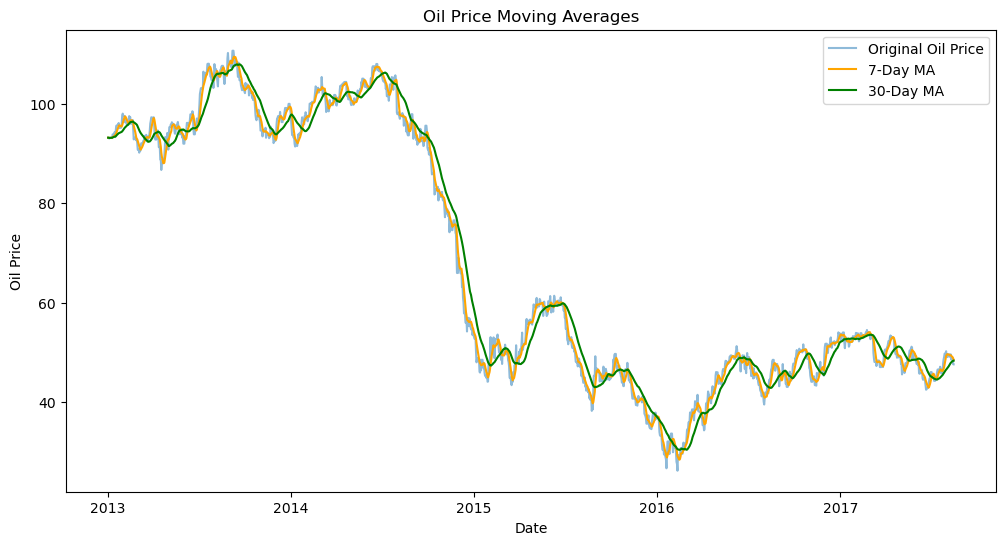

In [619]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_df["date"], train_df["dcoilwtico"], label="Original Oil Price", alpha=0.5)
plt.plot(train_df["date"], train_df["oil_price_ma_7"], label="7-Day MA", color="orange")
plt.plot(train_df["date"], train_df["oil_price_ma_30"], label="30-Day MA", color="green")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.title("Oil Price Moving Averages")
plt.legend()
plt.show()

### Sales Trend Over Time

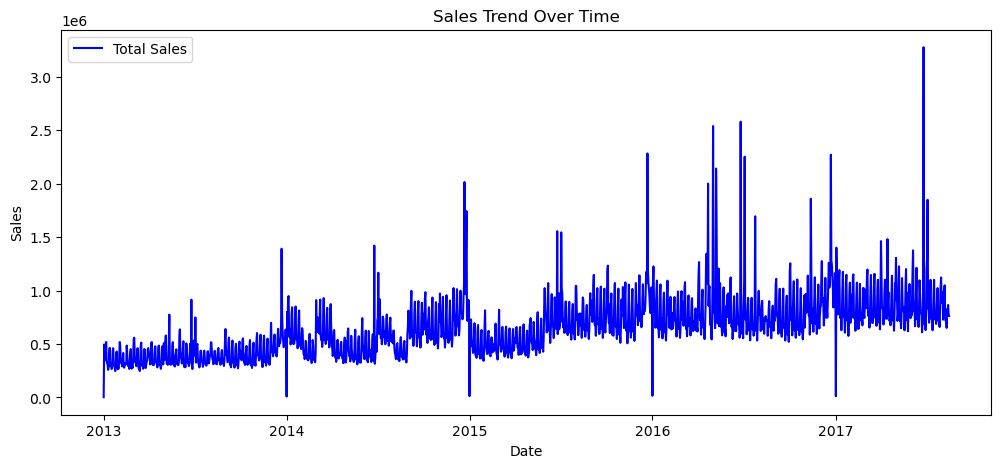

In [624]:
import matplotlib.pyplot as plt

# Aggregate sales by date
sales_trend = train_data.groupby("date")["sales"].sum()

# Plot sales trend
plt.figure(figsize=(12, 5))
plt.plot(sales_trend, label="Total Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.legend()
plt.show()

**The graph shows how sales have changed over time from 2013 to 2017. Overall, sales are increasing, which is a good sign. However, there are a lot of ups and downs. Some days, sales suddenly spike, which could be due to special events, discounts, or seasonal demand. There are also some sharp drops, which might be caused by store closures, missing data, or other issues. While sales are growing, the frequent changes suggest that different factors, like promotions or competition, are affecting them.**

### Seasonality Analysis (Monthly Sales)

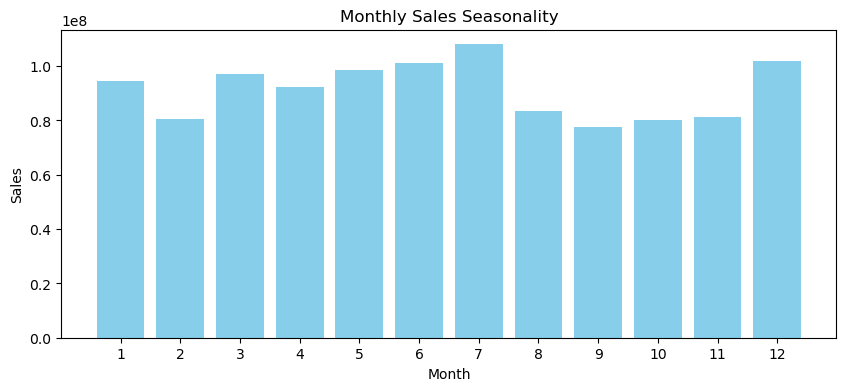

In [628]:
# Aggregate sales by month
train_data["month"] = train_data["date"].dt.month
monthly_sales = train_data.groupby("month")["sales"].sum()

# Plot monthly sales
plt.figure(figsize=(10, 4))
plt.bar(monthly_sales.index, monthly_sales.values, color="skyblue")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Seasonality")
plt.xticks(range(1, 13))
plt.show()

**The graph shows how sales vary across different months of the year. Sales are highest in July and December, which could be due to seasonal demand, holidays, or special events. February and September have the lowest sales, which might indicate a slow period for businesses. Other months show relatively stable sales with some fluctuations. This pattern suggests that sales are influenced by seasonal trends, and businesses can plan better by increasing stock or marketing efforts during peak months.**

### Sales by Store & Product Category

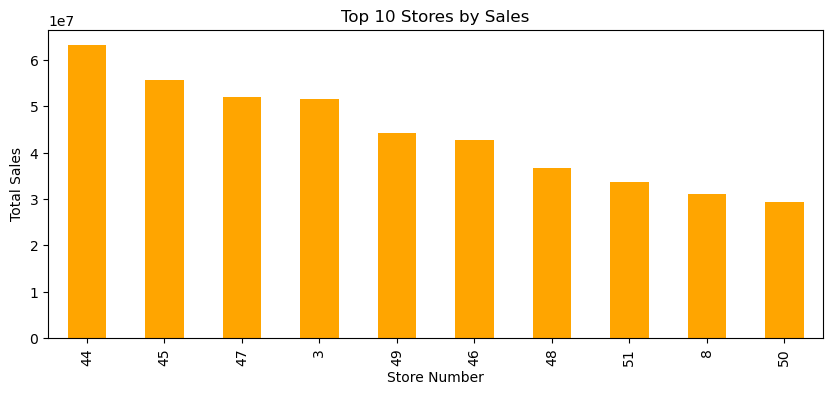

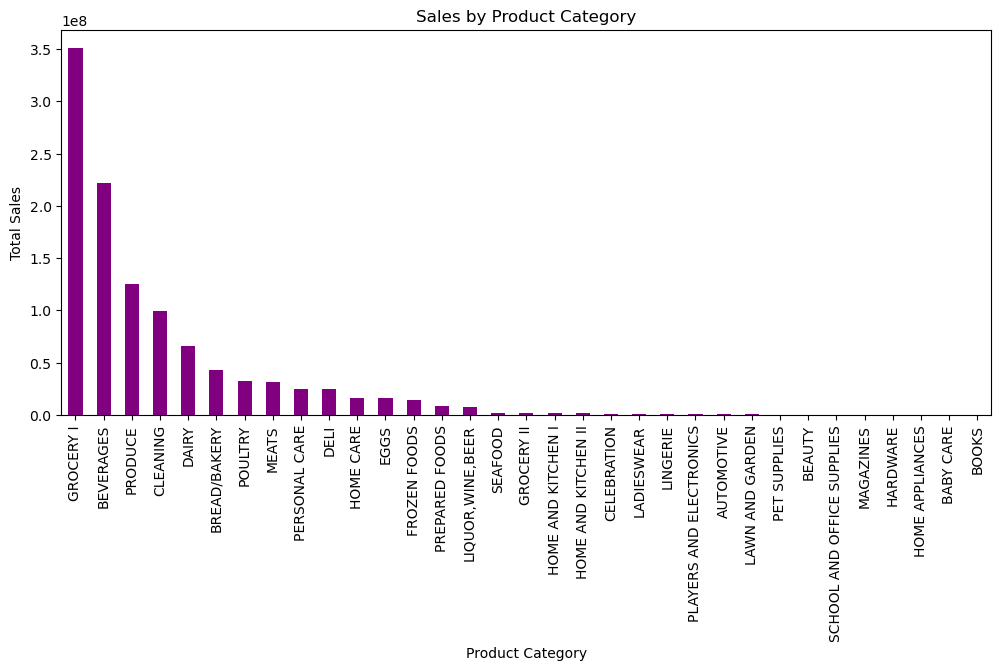

In [632]:
# Top 10 stores by total sales
top_stores = train_data.groupby("store_nbr")["sales"].sum().nlargest(10)

plt.figure(figsize=(10, 4))
top_stores.plot(kind="bar", color="orange")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.title("Top 10 Stores by Sales")
plt.show()

# Sales by product category
category_sales = train_data.groupby("family")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
category_sales.plot(kind="bar", color="purple")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Sales by Product Category")
plt.xticks(rotation=90)
plt.show()

**This bar chart shows the top 10 stores based on total sales. Store 44 has the highest sales, followed by stores 45 and 47. The sales gradually decrease as we move to the other stores, with store 50 having the lowest sales among the top 10. The difference in sales between the stores indicates that some locations perform significantly better than others, possibly due to factors like location, customer demand, or store size. Businesses can use this insight to analyze what makes the top stores successful and apply similar strategies to improve sales in other locations.**


### Relationship Between 30-Day Oil Price Moving Average and Sales

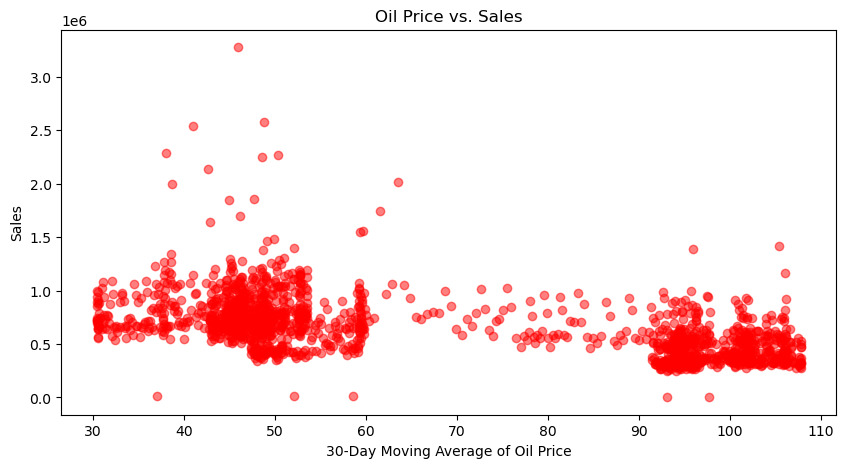

In [636]:
# Aggregate sales by date (same granularity as train_df)
sales_by_date = train_data.groupby("date")["sales"].sum().reset_index()

# Merge with train_df
merged_df = train_df.merge(sales_by_date, on="date", how="left")

# Drop NaNs if any
merged_df = merged_df.dropna()

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(merged_df["oil_price_ma_30"], merged_df["sales"], alpha=0.5, color="red")
plt.xlabel("30-Day Moving Average of Oil Price")
plt.ylabel("Sales")
plt.title("Oil Price vs. Sales")
plt.show()

**This scatter plot shows the relationship between oil prices and sales. The x-axis represents the 30-day moving average of oil prices, while the y-axis represents sales. The points are scattered across different oil price levels, suggesting that there is no strong or clear correlation between oil price changes and sales. However, there are clusters of sales data around certain price ranges, which might indicate some indirect influence. Businesses may need to analyze other factors, such as seasonal trends or external economic conditions, to understand the impact of oil prices on sales better.**


In [639]:
import seaborn as sns

### Checks relationships between numerical variables.

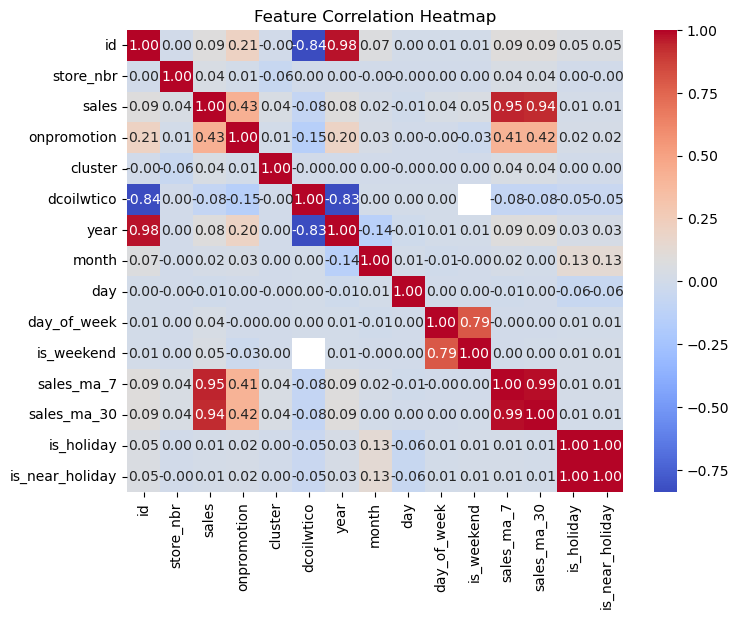

In [641]:
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=["number"])

# Compute and plot correlation matrix
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

**This heatmap shows the correlation between different features in the dataset. The values range from -1 to 1, where 1 represents a strong positive correlation, -1 represents a strong negative correlation, and values close to 0 indicate little to no correlation. The color intensity helps visualize the strength of these relationships.**

**From the heatmap, we can see that:**

**Sales are highly correlated with sales_ma_7 and sales_ma_30, meaning past sales trends strongly influence current sales.**

**Onpromotion has a moderate positive correlation with sales, suggesting that promotions have some impact on increasing sales.**

**Dcoilwtico (oil price) has a weak correlation with sales, indicating that oil prices do not significantly impact sales directly.**

**Day_of_week and is_weekend have a high correlation, which is expected since weekends fall on specific days.**

**Is_holiday and is_near_holiday are perfectly correlated, likely because one is derived from the other.**

### Store-Wise Sales Comparison

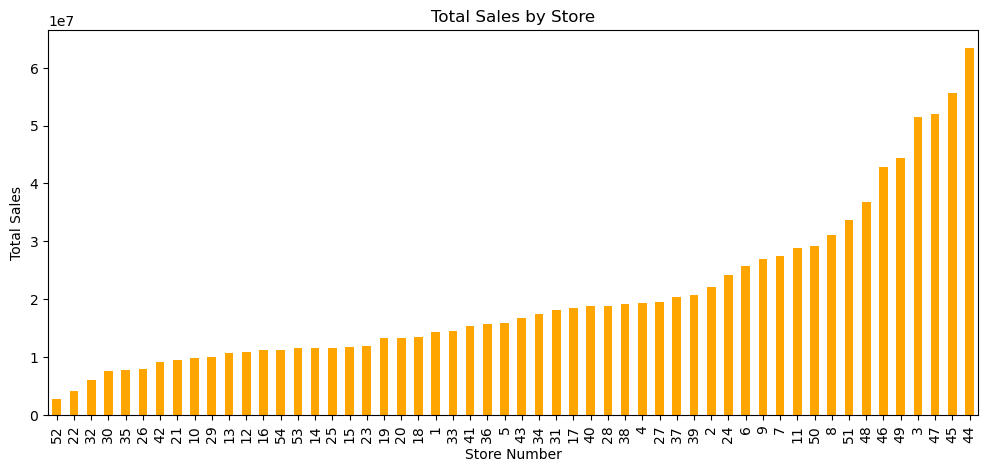

In [647]:
store_sales = train_data.groupby("store_nbr")["sales"].sum().sort_values()

plt.figure(figsize=(12, 5))
store_sales.plot(kind="bar", color="orange")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.title("Total Sales by Store")
plt.show()

**The bar chart represents the total sales across different stores, showing how sales vary from one store to another. Some stores, like Store 44, 45, and 47, have significantly higher sales compared to others, indicating that they are top performers. On the other hand, some stores have much lower sales, suggesting potential challenges such as lower customer traffic or less effective marketing strategies. The trend in the chart shows a gradual increase in sales for mid-range stores, but a steep rise for the top-performing ones. This suggests that a few stores contribute a major share of total sales. Understanding these differences can help businesses identify opportunities for improvement, such as running targeted promotions or analyzing the strategies of high-performing stores to replicate their success in other locations.**

### Handling Missing Values in Categorical Columns

In [651]:
train_data["type_y"].fillna("No Event", inplace=True)
train_data["locale"].fillna("Unknown", inplace=True)

In [652]:
train_data["dcoilwtico"].fillna(method="ffill", inplace=True)

### Handling Missing Values in Sales Moving Averages

In [655]:
train_data["sales_ma_7"].fillna(train_data["sales_ma_7"].median(), inplace=True)
train_data["sales_ma_30"].fillna(train_data["sales_ma_30"].median(), inplace=True)

**The given code fills missing values in the "sales_ma_7" and "sales_ma_30" columns using their respective median values. These columns likely represent the 7-day and 30-day moving averages of sales. Using the median ensures data completeness, prevents issues in analysis, and is robust against outliers. This approach helps maintain trend consistency, which is crucial for time-series analysis and forecasting.**

**Removing Irrelevant or Unnecessary Columns**

In [671]:
train_data.drop(columns=["locale_name", "description", "transferred"], inplace=True)

**The given code removes the "locale_name," "description," and "transferred" columns from the dataset. These columns are likely dropped because they do not contribute to the analysis or predictive modeling, may contain redundant information, or are not useful for numerical computations. Removing such columns helps reduce data complexity, improve model performance, and optimize storage.**

In [675]:
train_data.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
city               0
state              0
type_x             0
cluster            0
dcoilwtico         0
type_y             0
locale             0
year               0
month              0
day                0
day_of_week        0
is_weekend         0
sales_ma_7         0
sales_ma_30        0
is_holiday         0
is_near_holiday    0
dtype: int64

#### Extracting Time-Based Features for Analysis

In [683]:
#  Feature Engineering: Extract Time-Based Features
train_data["year"] = train_data["date"].dt.year
train_data["month"] = train_data["date"].dt.month
train_data["day"] = train_data["date"].dt.day
train_data["day_of_week"] = train_data["date"].dt.weekday  # Monday = 0, Sunday = 6
train_data["is_weekend"] = (train_data["day_of_week"] >= 5).astype(int)

**The given code extracts various time-related features from the "date" column to enhance analysis and predictive modeling. It creates new columns for year, month, day, and day of the week to help understand seasonal patterns and trends. Additionally, it identifies weekends by checking if the day of the week corresponds to Saturday or Sunday (values 5 or 6) and assigns 1 for weekends and 0 for weekdays. These features are useful for identifying sales patterns, holiday effects, and time-based trends in the data.**

#### Creating Lag Features & Rolling Statistics for Time Series Forecasting

In [687]:
# Lag Features & Rolling Statistics (for time series forecasting)
train_data["sales_lag_7"] = train_data["sales"].shift(7)  # Sales 7 days ago
train_data["sales_lag_30"] = train_data["sales"].shift(30)  # Sales 30 days ago
train_data["sales_ma_7"] = train_data["sales"].rolling(window=7).mean()  # 7-day moving average
train_data["sales_ma_30"] = train_data["sales"].rolling(window=30).mean()  # 30-day moving average

**This code helps in preparing sales data for forecasting by creating lag features and moving averages. Lag features, such as sales from 7 days ago (sales_lag_7) and 30 days ago (sales_lag_30), allow the model to recognize past patterns that might influence future sales. Moving averages, like the 7-day average (sales_ma_7) and 30-day average (sales_ma_30), smooth out short-term fluctuations and highlight overall trends. These features are useful in time series forecasting as they help capture seasonality and long-term patterns, improving the accuracy of sales predictions.**

In [694]:
# Fill NaN values created by rolling functions
train_data.fillna(0, inplace=True)

In [697]:
# Handle Categorical Features
categorical_cols = ["family", "city", "state", "type_x", "type_y", "locale"]  # List of categorical columns

In [699]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [700]:
# Convert categorical variables to numerical using OneHotEncoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(train_data[categorical_cols])

In [704]:
# Convert to DataFrame and merge
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
train_data = pd.concat([train_data, encoded_df], axis=1)
train_data.drop(columns=categorical_cols, inplace=True)  # Drop original categorical columns

In [706]:
print(train_data.head())

   id       date  store_nbr  sales  onpromotion  cluster  dcoilwtico  year  \
0   0 2013-01-01          1    0.0            0       13       93.14  2013   
1   1 2013-01-01          1    0.0            0       13       93.14  2013   
2   2 2013-01-01          1    0.0            0       13       93.14  2013   
3   3 2013-01-01          1    0.0            0       13       93.14  2013   
4   4 2013-01-01          1    0.0            0       13       93.14  2013   

   month  day  ...  type_y_Bridge  type_y_Event  type_y_Holiday  \
0      1    1  ...            0.0           0.0             1.0   
1      1    1  ...            0.0           0.0             1.0   
2      1    1  ...            0.0           0.0             1.0   
3      1    1  ...            0.0           0.0             1.0   
4      1    1  ...            0.0           0.0             1.0   

   type_y_No Event  type_y_Transfer  type_y_Work Day  locale_Local  \
0              0.0              0.0              0.0      

### Split Data into Train & Test Sets

In [712]:
# Prepare Data for Model Training
X = train_data.drop(columns=["sales", "date"])  # Features (Drop 'date' before training)
y = train_data["sales"]  # Target variable

In [713]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)  # No shuffling for time series

print("Shape of X_train:", X_train.shape, "Shape of X_test:", X_test.shape)

Shape of X_train: (2443478, 103) Shape of X_test: (610870, 103)


### Random Forest Model

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, rf_preds, squared=False)
mae_rf = mean_absolute_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}, R2 Score: {r2_rf}")

Random Forest - RMSE: 198.5881882504339, MAE: 45.5980999981825, R2 Score: 0.9788461836602868


### XGBoost Regressor

In [187]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
rmse_xgb = mean_squared_error(y_test, xgb_preds, squared=False)
mae_xgb = mean_absolute_error(y_test, xgb_preds)
r2_xgb = r2_score(y_test, xgb_preds)

print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R2 Score: {r2_xgb}")

XGBoost - RMSE: 304.1616689312008, MAE: 82.1023862853729, R2 Score: 0.9503761029654914


### LSTM Model

In [719]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train, X_test, y_train, y_test are already defined
# Convert y_train and y_test to NumPy arrays and reshape correctly
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Scale the features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_lstm, y_train_scaled,
    validation_data=(X_test_lstm, y_test_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred_scaled = model.predict(X_test_lstm)

# Inverse transform predictions to get actual sales values
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
print(f"LSTM - RMSE: {rmse}")


Epoch 1/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - loss: 1.6017e-05 - val_loss: 8.3442e-06
Epoch 2/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 5.6442e-06 - val_loss: 7.8661e-06
Epoch 3/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 125s 3ms/step - loss: 5.3486e-06 - val_loss: 7.1046e-06
Epoch 4/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 4.3254e-06 - val_loss: 7.3016e-06
Epoch 5/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 3.6585e-06 - val_loss: 1.4797e-05
Epoch 6/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 127s 3ms/step - loss: 3.8008e-06 - val_loss: 6.5182e-06
Epoch 7/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 127s 3ms/step - loss: 3.4854e-06 - val_loss: 5.3119e-06
Epoch 8/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 3.3463e-06 - val_loss: 6.0244e-06
Epoch 9/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 127s 3ms/step - loss: 3.1699e-06 - val_loss: 6.5685e-06
Epoch 10/50
38180/38180 ━━━━━━━━━━━━━━━━━━━━ 128s 3ms/step - loss: 3.0733e-06 - val_loss: 5.7909e-06

In [726]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train, X_test, y_train, y_test are already defined
# Convert y_train and y_test to NumPy arrays and reshape correctly
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Scale the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_lstm, y_train_scaled,
    validation_data=(X_test_lstm, y_test_scaled),
    epochs=100,
    batch_size=512,  # Increased batch size for large dataset
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred_scaled = model.predict(X_test_lstm)

# Inverse transform predictions to get actual sales values
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
print(f"LSTM - RMSE: {rmse}")

Epoch 1/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - loss: 1.9649e-05 - val_loss: 8.3944e-06
Epoch 2/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 6.6485e-06 - val_loss: 6.7748e-06
Epoch 3/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 5.9672e-06 - val_loss: 1.0124e-05
Epoch 4/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 4.8123e-06 - val_loss: 7.3817e-06
Epoch 5/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 4.3920e-06 - val_loss: 9.3064e-06
Epoch 6/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 4.7117e-06 - val_loss: 6.3974e-06
Epoch 7/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 3.7196e-06 - val_loss: 6.2023e-06
Epoch 8/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 3.7725e-06 - val_loss: 6.5302e-06
Epoch 9/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 3.4521e-06 - val_loss: 6.2894e-06
Epoch 10/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 3.2700e-06 - val_loss: 5.6452e-06
Epoch 11/100
4773/4

## Challenge:

**While training our model with hyperparameter tuning, we encountered a MemoryError because the dataset was too large. This caused the system to run out of RAM, making it difficult to complete the training process.**

**Solution:**

**To overcome this issue, we took the following steps:**

**Reduced the Number of Features – Used PCA (Principal Component Analysis) to select only the most important features, reducing the dataset size.**

**Used a Smaller Dataset for Tuning – Instead of training on the entire dataset, we selected only 10% of the data for hyperparameter tuning.**

**Changed Data Type – Converted the dataset from float64 to float32, cutting memory usage in half.**

**Limited the Number of Combinations – Reduced the number of hyperparameter combinations tested, making the process faster and more memory-efficient.**

**Optimized Parallel Processing – Set n_jobs=1 to prevent excessive memory consumption.**

In [732]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (assuming X_train, X_test, y_train, y_test are predefined)

# Ensure the data is in float32 format to avoid precision issues
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Scale the features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train = y_train.reshape(-1, 1)  # Corrected reshaping
y_test = y_test.reshape(-1, 1)  # Corrected reshaping
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reduce dimensionality with PCA
n_components = min(200, X_train_scaled.shape[1])  # Ensure PCA components do not exceed features
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Sample only 10% of the dataset for hyperparameter tuning
sample_size = int(0.1 * len(X_train_pca))
X_train_sample = X_train_pca[:sample_size]
y_train_sample = y_train_scaled[:sample_size]

# Define XGBoost model and hyperparameter grid
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
param_dist = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0]
}

# Reduce number of hyperparameter iterations
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=5,  # Reduce iterations to optimize performance
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=2,
    n_jobs=1  # Prevent memory overload
)

# Fit on reduced dataset
random_search.fit(X_train_sample, y_train_sample.ravel())

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_pca, (X_train_pca.shape[0], 1, X_train_pca.shape[1]))
X_test_lstm = np.reshape(X_test_pca, (X_test_pca.shape[0], 1, X_test_pca.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, X_train_pca.shape[1])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_lstm, y_train_scaled,
    validation_data=(X_test_lstm, y_test_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred_scaled = model.predict(X_test_lstm)

# Inverse transform predictions to get actual sales values
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
print(f"LSTM - RMSE: {rmse}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   6.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   6.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   3.6s
[CV] EN

### Compare Model Performance

In [734]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Train and test datasets (Assuming X_train, X_test, y_train, y_test are already defined)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, rf_preds, squared=False)
mae_rf = mean_absolute_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, xgb_preds, squared=False)
mae_xgb = mean_absolute_error(y_test, xgb_preds)
r2_xgb = r2_score(y_test, xgb_preds)

# Train LSTM Model
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_lstm, y_train_scaled, validation_data=(X_test_lstm, y_test_scaled), epochs=100, batch_size=512, callbacks=[early_stopping], verbose=1)
y_pred_scaled = model.predict(X_test_lstm)
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_actual))

Epoch 1/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - loss: 1.7029e-05 - val_loss: 8.2586e-06
Epoch 2/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 6.5969e-06 - val_loss: 1.8751e-05
Epoch 3/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 5.8353e-06 - val_loss: 6.8314e-06
Epoch 4/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 4.3264e-06 - val_loss: 7.5953e-06
Epoch 5/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 4.2223e-06 - val_loss: 6.4963e-06
Epoch 6/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 4.0944e-06 - val_loss: 6.8198e-06
Epoch 7/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 4.3609e-06 - val_loss: 7.8887e-06
Epoch 8/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 3.6942e-06 - val_loss: 6.2624e-06
Epoch 9/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 3.4783e-06 - val_loss: 6.0749e-06
Epoch 10/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - loss: 3.5810e-06 - val_loss: 6.2573e-06
Epoch 11/

In [735]:
# Model Comparison
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LSTM"],
    "RMSE": [rmse_rf, rmse_xgb, rmse_lstm],
    "MAE": [mae_rf, mae_xgb, None],  # LSTM MAE is not computed
    "R2 Score": [r2_rf, r2_xgb, None]  # LSTM R2 Score is not computed
})
print(results)

           Model        RMSE        MAE  R2 Score
0  Random Forest  198.588188  45.598100  0.978846
1        XGBoost  304.161669  82.102386  0.950376
2           LSTM  269.780841        NaN       NaN


In [795]:
import pandas as pd

# Load test dataset (ensure it matches training features)
X_test_final = test_data.drop(columns=["id"])  # Remove 'id' from features

# Ensure test set has the same feature encoding as training
missing_cols = set(X_train.columns) - set(X_test_final.columns)  # Find missing columns
for col in missing_cols:
    X_test_final[col] = 0  # Add missing columns with default value

# Ensure column order matches training data
X_test_final = X_test_final[X_train.columns]  

# Generate Predictions using Random Forest
test_data["sales"] = rf_model.predict(X_test_final)

# Ensure non-negative values
test_data["sales"] = test_data["sales"].clip(0)

# Select only 'id' and 'sales' for submission
submission_df = test_data[["id", "sales"]]

# Save submission file
submission_df.to_csv("submission.csv", index=False)

print(f" Submission file saved. Shape: {submission_df.shape}")

 Submission file saved. Shape: (28512, 2)


**This code is basically taking the test dataset, making sure it matches the format of the training data, generating sales predictions using the Random Forest model, and then saving the results in a proper submission file.**

**One of the common issues when working with machine learning models is that the test data might not have the exact same features as the training data. This usually happens when categorical variables were converted into multiple columns (one-hot encoding), and some categories might be missing in the test set. To fix this, the code first checks for any missing columns and adds them with default values (0). It also makes sure that the order of columns in the test dataset is the same as in the training dataset—otherwise, the model might get confused and give incorrect results.**

**Once the data is properly formatted, the code uses the trained Random Forest model to predict sales values. Since sales can’t be negative, any negative predictions are set to 0 just to be safe. Finally, it prepares the submission file by keeping only the "id" and "sales" columns and saves it as "submission.csv". A final print statement confirms that everything went smoothly by displaying the shape of the file.**

**The main challenges here were handling feature mismatches (ensuring all required columns are present), making sure the column order is correct, and dealing with negative predictions. By taking care of these, the code ensures that the final predictions are in the right format and ready for submission.**